In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate
from scipy import signal
from scipy.ndimage import gaussian_filter

In [37]:
from google.colab import drive
drive.mount('/content/drive')

directory_ICS = '/content/drive/MyDrive/НС_15-09-22/данные_в_csv/окулограф_ICS/Y1_2022_09_15_20_43_03.csv'

directory_imu1 = '/content/drive/MyDrive/НС_15-09-22/данные_в_csv/Инерциалки/правое/Y1_imu1.csv'
directory_imu2 = '/content/drive/MyDrive/НС_15-09-22/данные_в_csv/Инерциалки/левое/Y1_imu2.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
df_ICS = pd.read_csv(directory_ICS)

df_imu1 = pd.read_csv(directory_imu1)
df_imu2 = pd.read_csv(directory_imu2)

In [39]:
time_ics = np.array(df_ICS['Time'][:])
hor = np.array(df_ICS['Hor_eye'][:])
ver = np.array(df_ICS['Ver_eye'][:])

g1 = np.array(df_imu1[['gx', 'gy', 'gz']])
g2 = np.array(df_imu2[['gx', 'gy', 'gz']])

a1 = np.array(df_imu1[['ax', 'ay', 'az']])
a2 = np.array(df_imu2[['ax', 'ay', 'az']])
time_imu1 = df_imu1['server_time'][:]

In [40]:
# время инерциалок
seconds_imu = []
for j in range(len(time_imu1)):
    time_j = time_imu1[j][-15:-1].split(':')
    seconds_imu.append(int(time_j[0])*60*60 + int(time_j[1])*60 + float(time_j[2]))

In [41]:
# обрезаем начало
seconds_imu = np.array(seconds_imu)
i = 0
if min(time_ics) > min(seconds_imu):
    while seconds_imu[i] < time_ics[0]:
        seconds_imu = np.delete(seconds_imu, i)
        g1 = np.delete(g1, i, 0)
        g2 = np.delete(g2, i, 0)
        a1 = np.delete(a1, i, 0)
        a2 = np.delete(a2, i, 0)
if min(time_ics) < min(seconds_imu):
    while time_ics[i] < seconds_imu[0]:
        time_ics = np.delete(time_ics, i)
        hor = np.delete(hor, i)
        ver = np.delete(ver, i)


In [42]:
# обрезаем конец
j = -1
if max(time_ics) > max(seconds_imu):
    while time_ics[j] > seconds_imu[-1]:
        time_ics = np.delete(time_ics, j)
        hor = np.delete(hor, j)
        ver = np.delete(ver, j)

if max(time_ics) < max(seconds_imu):
    while seconds_imu[j] > time_ics[-1]:
        seconds_imu = np.delete(seconds_imu, j)
        g1 = np.delete(g1, j, 0)
        g2 = np.delete(g2, j, 0)
        a1 = np.delete(a1, j, 0)
        a2 = np.delete(a2, j, 0)

In [43]:
print(len(time_ics), len(seconds_imu))

19601 14150


In [44]:
time = np.concatenate((seconds_imu, time_ics), axis = 0)
time.sort
seconds_imu = seconds_imu - time[0]
time_ics = time_ics - time[0]
time = time - time[0]

In [45]:
def interpolate_func(time, time_new, y):
    y = np.array(y)
    time = np.array(time)
    time_new = np.array(time_new)
    y = gaussian_filter(y, sigma=3)
    f = interpolate.interp1d(time, y, fill_value = "extrapolate")
    ynew = f(time_new)
    return ynew

In [46]:
imu1_gx = interpolate_func(seconds_imu, time, g1[:,0])
imu1_gy = interpolate_func(seconds_imu, time, g1[:,1])
imu1_gz = interpolate_func(seconds_imu, time, g1[:,2])

In [47]:
imu2_gx = interpolate_func(seconds_imu, time, g2[:,0])
imu2_gy = interpolate_func(seconds_imu, time, g2[:,1])
imu2_gz = interpolate_func(seconds_imu, time, g2[:,2])

In [48]:
imu1_ax = interpolate_func(seconds_imu, time, a1[:,0])
imu1_ay = interpolate_func(seconds_imu, time, a1[:,1])
imu1_az = interpolate_func(seconds_imu, time, a1[:,2])

In [49]:
imu2_ax = interpolate_func(seconds_imu, time, a2[:,0])
imu2_ay = interpolate_func(seconds_imu, time, a2[:,1])
imu2_az = interpolate_func(seconds_imu, time, a2[:,2])

In [50]:
# plt.rcParams["figure.figsize"] = (25,7)
# plt.plot(seconds_imu[700:1000], gx[700:1000], 'o', time[700:1000], imu1_gx[700:1000], '.')
# plt.show()

In [51]:
hor_intp = interpolate_func(time_ics, time, hor)
ver_intp = interpolate_func(time_ics, time, ver)

In [52]:
# plt.rcParams["figure.figsize"] = (15,5)
# plt.plot(time_ics[1300:1500], hor[1300:1500], 'o', time[930:1050], hor_intp[930:1050], '.')
# plt.show()

In [53]:
# plt.rcParams["figure.figsize"] = (20,5)
# plt.plot(time, imu1_gx, '.')
# plt.plot(time, imu1_gy, '.')
# plt.plot(time, imu1_gz, '.')
# plt.show()

In [54]:
# plt.rcParams["figure.figsize"] = (20,5)
# plt.plot(time, imu2_gx, '.')
# plt.plot(time, imu2_gy, '.')
# plt.plot(time, imu2_gz, '.')
# plt.show()

In [55]:
# fig, ax = plt.subplots(ncols=2, figsize=(40, 5))
# ax[0].plot(time, imu1_ax, '-')
# ax[0].plot(time, imu1_ay, '-')
# ax[0].plot(time, imu1_az, '-')
# ax[1].plot(time, imu2_ax, '-')
# ax[1].plot(time, imu2_ay, '-')
# ax[1].plot(time, imu2_az, '-')
# plt.show()

In [56]:
X = imu2_gx.reshape(-1,1)
y = hor_intp.reshape(-1,1)

In [72]:
from sklearn.preprocessing import StandardScaler
n1 = 1500
n2 = 13000
x_train = StandardScaler().fit_transform(X[n1:n2])
y_train = StandardScaler().fit_transform(y[n1:n2])

In [58]:
# plt.plot(y[1500:2000])

In [59]:
# from sklearn.model_selection import train_test_split, cross_val_score
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [60]:
# print(len(x_train), len(y_train), len(x_test), len(y_test))

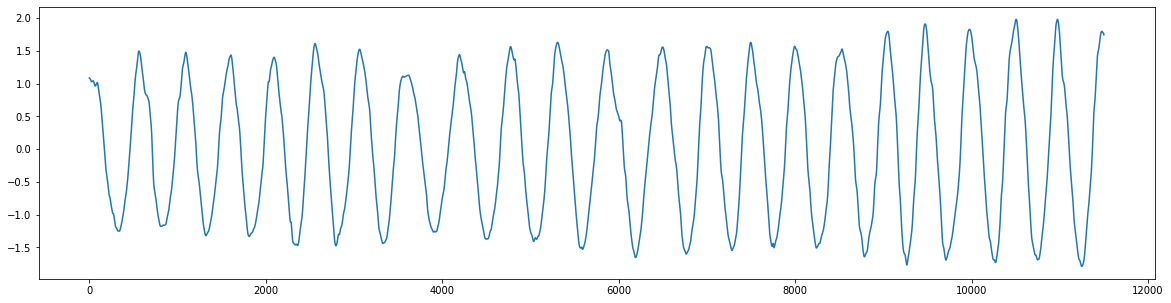

In [71]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(x_train[1500:13000])

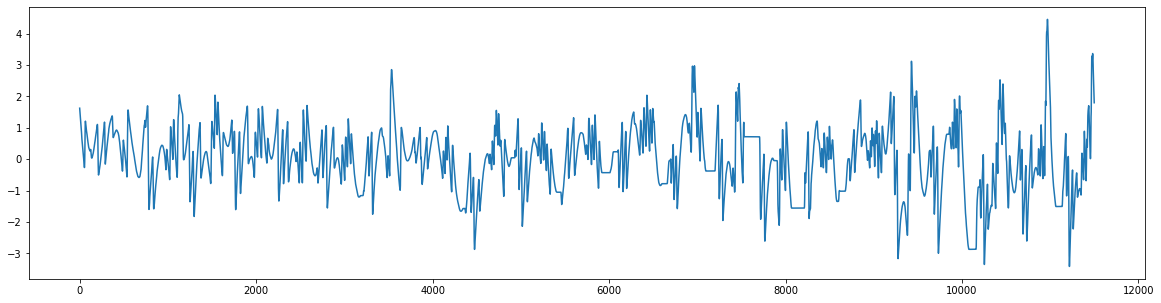

In [73]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(y_train)

In [74]:
features_set = []
labels = []
n = 100
k = 1
for i in range(n, len(x_train)):
    features_set.append(x_train[i-n:i-k, 0])
    labels.append(y_train[i-k:i, 0])

In [75]:
features_set, labels = np.array(features_set), np.array(labels)
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
labels = np.reshape(labels, (labels.shape[0], labels.shape[1], 1))
features_set.shape

(11400, 99, 1)

In [65]:
labels.shape

(33651, 1, 1)

In [66]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [76]:
model = Sequential()
model.add(LSTM(units= 50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units = labels.shape[1]))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [77]:
model.fit(features_set, labels, epochs = 10, batch_size = 16)


Epoch 1/10
713/713 [==============================] - 95s 127ms/step - loss: 0.8990
Epoch 2/10
713/713 [==============================] - 88s 124ms/step - loss: 0.8025
Epoch 3/10
713/713 [==============================] - 89s 125ms/step - loss: 0.8197
Epoch 4/10
713/713 [==============================] - 89s 124ms/step - loss: 0.7831
Epoch 5/10
713/713 [==============================] - 89s 124ms/step - loss: 0.7826
Epoch 6/10
713/713 [==============================] - 90s 127ms/step - loss: 0.8147
Epoch 7/10
713/713 [==============================] - 92s 129ms/step - loss: 0.8231
Epoch 8/10
713/713 [==============================] - 95s 133ms/step - loss: 0.8149
Epoch 9/10
713/713 [==============================] - 90s 126ms/step - loss: 0.7941
Epoch 10/10
713/713 [==============================] - 89s 125ms/step - loss: 0.7751


In [78]:
model2 = Sequential()
model2.add(LSTM(units= 50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model2.add(Dropout(0.2))

model2.add(LSTM(units=50, return_sequences=True))
model2.add(Dropout(0.2))

# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

model2.add(LSTM(units=50))
model2.add(Dropout(0.2))

model2.add(Dense(units = labels.shape[1]))

model2.compile(optimizer = 'adam', loss = 'mean_absolute_error')

In [79]:
model2.fit(features_set, labels, epochs = 10, batch_size = 16)


Epoch 1/10
713/713 [==============================] - 96s 126ms/step - loss: 0.7496
Epoch 2/10
713/713 [==============================] - 88s 124ms/step - loss: 0.7292
Epoch 3/10
713/713 [==============================] - 89s 125ms/step - loss: 0.7116
Epoch 4/10
713/713 [==============================] - 93s 131ms/step - loss: 0.7012
Epoch 5/10
713/713 [==============================] - 96s 135ms/step - loss: 0.6997
Epoch 6/10
713/713 [==============================] - 96s 135ms/step - loss: 0.7161
Epoch 7/10
713/713 [==============================] - 93s 130ms/step - loss: 0.7198
Epoch 8/10
713/713 [==============================] - 94s 132ms/step - loss: 0.6939
Epoch 9/10
713/713 [==============================] - 93s 130ms/step - loss: 0.6845
Epoch 10/10
713/713 [==============================] - 93s 130ms/step - loss: 0.6820


In [80]:
model2.fit(features_set, labels, epochs = 10, batch_size = 32)


Epoch 1/10
357/357 [==============================] - 53s 149ms/step - loss: 0.6682
Epoch 2/10
357/357 [==============================] - 53s 150ms/step - loss: 0.6603
Epoch 3/10
357/357 [==============================] - 54s 151ms/step - loss: 0.6621
Epoch 4/10
357/357 [==============================] - 56s 158ms/step - loss: 0.6525
Epoch 5/10
357/357 [==============================] - 54s 150ms/step - loss: 0.6509
Epoch 6/10
357/357 [==============================] - 56s 156ms/step - loss: 0.6519
Epoch 7/10
357/357 [==============================] - 54s 150ms/step - loss: 0.6501
Epoch 8/10
357/357 [==============================] - 53s 148ms/step - loss: 0.6464
Epoch 9/10
357/357 [==============================] - 55s 153ms/step - loss: 0.6377
Epoch 10/10
357/357 [==============================] - 53s 149ms/step - loss: 0.6360
